# Exploratory Data Analysis

In this notebook we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do much at this point. In addition, when we create them, we won't be able to extract many insights because of the nature of text-based features. For this reason, only a shallow analysis will be done at this point.

For the plots we have used `seaborn` and `altair`. `altair` is a package which allows us to plot graphics with a simple grammar as we would do in ggplot2 or Tableau. It also provides easy-to-make interactive plots. For further information please visit the project site: https://altair-viz.github.io/.

To install it, please type this command in the shell:

`! conda install -c conda-forge altair vega_datasets notebook vega`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
! pwd

/Users/helgy8/HerKoderVI/CSCE5222Assignments/ICE_1


Loading the dataset:

In [3]:
df_path = "/Users/helgy8/HerKoderVI/CSCE5222Assignments/ICE_1/"
df_path2 = df_path + 'News_dataset.csv'
df = pd.read_csv(df_path2, sep=';')

In [4]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,005.txt-business


### Number of articles in each category

In [5]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

graph = (bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

### % of articles in each category

In [6]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [7]:
df['News_length'] = df['Content'].str.len()

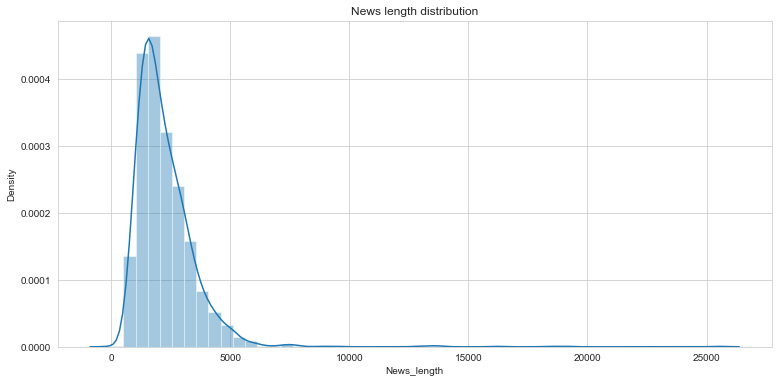

In [8]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [9]:
df['News_length'].describe()

count     2229.000000
mean      2271.278600
std       1388.449902
min          7.000000
25%       1447.000000
50%       1969.000000
75%       2804.000000
max      25484.000000
Name: News_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [10]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

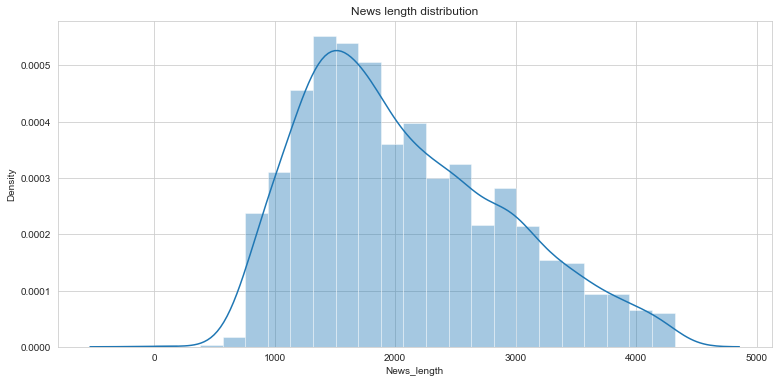

In [11]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [12]:
df_more10k = df[df['News_length'] > 10000]
len(df_more10k)

8

Let's see one:

In [13]:
df_more10k['Content'].iloc[0]

'Scissor Sisters triumph at Brits\n\nUS band Scissor Sisters led the winners at the UK music industry\'s Brit Awards, walking off with three prizes. The flamboyant act scored a hat-trick in the international categories, winning the best group, best album and best newcomer awards. Glasgow group Franz Ferdinand won two prizes, as did Keane and Joss Stone, who was voted best urban act by digital TV viewers. Robbie Williams\' Angels was named the best song of the past 25 years. Scissor Sisters frontwoman Ana Matronic collected the best international album prize from singer Siouxsie Sioux. She told the audience: "If you told us a year ago we would be getting these awards today we would have called you crazy. You guys made our dream come true."\n\nThe band - whose self-titled LP was 2004\'s biggest-selling album - thanked "all the members of the sisterhood", adding: "We wouldn\'t be here without you." The US band, who opened the show with Take Your Mama, won the best international act and ne

It's just a large news article.

Let's now plot a boxplot:

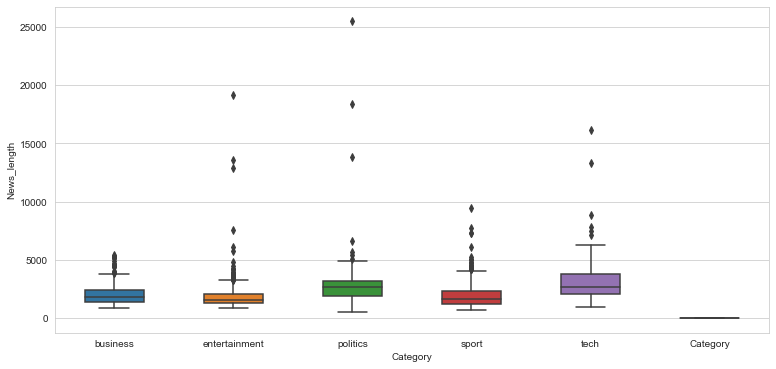

In [14]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

Now, let's remove the larger documents for better comprehension:

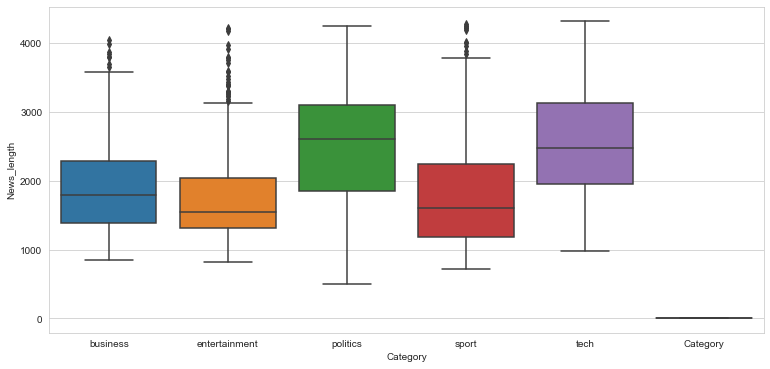

In [15]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

We'll save the dataset:

In [16]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)